# Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
# Libraries
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [23]:
# your code here
# Define the funcion
def dice_rolling():
    return random.choices(range(1,7),k=10)
display(dice_rolling())

[6, 1, 5, 3, 4, 5, 1, 1, 4, 6]

In [26]:
# Save to Df with list comprehension
df_dice = pd.DataFrame({'turn': [i for i in range(1,11)], 'value':[i for i in dice_rolling()]}).set_index('turn')
df_dice

,value
turn,
1,6
2,1
3,4
4,3
5,6
6,2
7,1
8,2
9,4


In [46]:
# Use funcion to create Df directly
df_dice = pd.DataFrame(random.choices(range(1,7),k=10), columns =["value"])
df_dice

,value
0,5
1,4
2,5
3,4
4,4
5,4
6,1
7,5
8,1
9,2


#### 2.- Plot the results sorted by value.

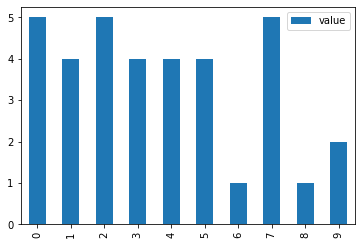

In [56]:
# your code here
df_dice.plot(kind = 'bar')
# not sorted by value

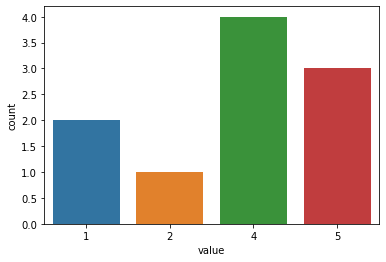

In [57]:
# sns to be sorted by value
sns.countplot(data=df_dice, x='value');

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

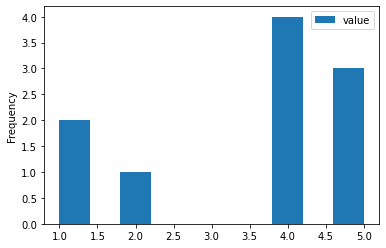

In [59]:
# your code here
# On way will be to just plot hist
df_dice.plot(kind = 'hist')

The first graph only represents the data from the dataframe, the second one counts number of times each value appears, and plots that number.

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [77]:
# your code here
def mean(df_dice):
    return sum(df_dice['value'])/len(df_dice['value'])

mean(df_dice)

3.5

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [63]:
# your code here
def mean_freq_dist(df_dice):
    df_freq_dist = df_dice['value'].value_counts().to_frame().reset_index()
    return sum(df_freq_dist['index']*df_freq_dist['value'])/len(df_dice['value'])


mean_freq_dist(df_dice)

3.5

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [64]:
# your code here
def dice_median(x):
    
    rolls = sorted(x.to_list())
    midpoint = len(rolls) / 2
    
    if len(rolls)%2 == 0:
        return (rolls[int(midpoint-1)] + rolls[int(midpoint)]) / 2
    
    else:
        return rolls[int(midpoint-0.5)]
dice_median(df_dice['value'])

4.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [70]:
# your code here
def dice_quartiles(x):

    Q2 = dice_median(x)
    Q1 = (x.min() + Q2) / 2
    Q3 = (x.max() + Q2) / 2
    
    print(f' Q1 = {Q1}\n Q2 = {Q2}\n Q3 = {Q3}')
dice_quartiles(df_dice['value'])

 Q1 = 2.5
 Q2 = 4.0
 Q3 = 4.5


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

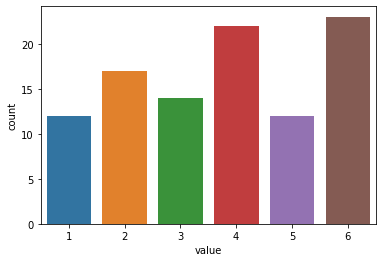

In [73]:
# your code here
df_dice_100 = pd.read_csv('../data/roll_the_dice_hundred.csv')
sns.countplot(data=df_dice_100, x='value');

Frequency distribution is not equally distributed. Maybe 100 times are not enough for data to balance. However this distribution is better looking than the 10-times tried above. 

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [79]:
# your code here
mean(df_dice_100)

3.74

#### 3.- Now, calculate the frequency distribution.


In [80]:
# your code here
df_dice_100['value'].value_counts()

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

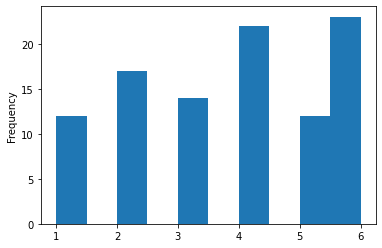

In [100]:
# your code here
df_dice_100['value'].plot(kind = 'hist')

Frequency distribution is not equally distributed

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

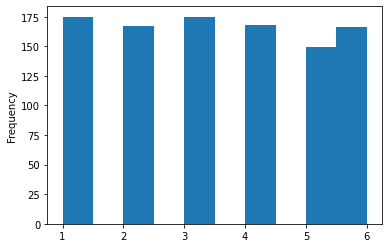

In [101]:
# your code here
df = pd.read_csv('../data/roll_the_dice_thousand.csv')
df.rename(columns = {'roll': 'index'}, inplace = True)

df['value'].plot(kind = 'hist')

Frequency distribution looks better mainly because the sample is larger (x10 times)

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

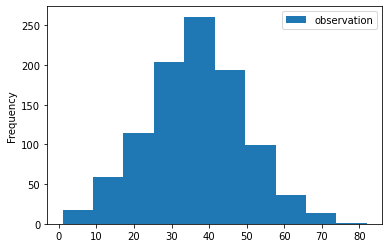

In [102]:
# your code here
df = pd.read_csv('../data/ages_population.csv')

df.plot(kind = 'hist')

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [103]:
# your code here
display(df['observation'].mean())
display(df['observation'].std())

36.56

12.81649962597677

Relatively

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

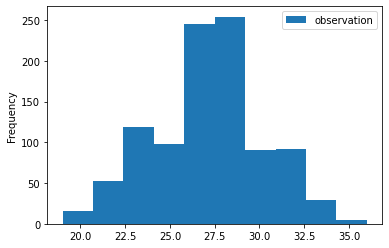

In [104]:
# your code here
df = pd.read_csv('../data/ages_population2.csv')
df.plot(kind = 'hist')

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

AS the range we are looking at is lower, the distribution is thus more homog. 

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [105]:
# your code here
display(df['observation'].mean())
display(df['observation'].std())


27.155

2.9698139326891835

A vast number of dataset falls between 26-28 years old. This means data is mostly around the mean, that explains std's value.

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

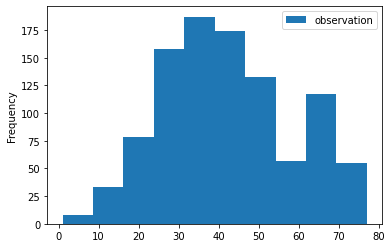

In [112]:
# your code here
df = pd.read_csv('../data/ages_population3.csv')

df.plot(kind = 'hist')

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [113]:
# your code here
display(df['observation'].mean())
display(df['observation'].std())

41.989

16.14470595986593

More disperse dataset - with agglomeration of observations around 32-46

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [115]:
# your code here
df['observation'].quantile([0.25, 0.5, 0.75])

0.25    30.0
0.50    40.0
0.75    53.0
Name: observation, dtype: float64

In [109]:
"""
your comments here
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [118]:
# your code here
df['observation'].quantile(np.arange(0.0, 1.0, 0.2))

0.0     1.0
0.2    28.0
0.4    36.0
0.6    45.0
0.8    57.0
Name: observation, dtype: float64

Almost all population is between 0.6 and 0.2 percentil (28-57 years old).

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""